In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

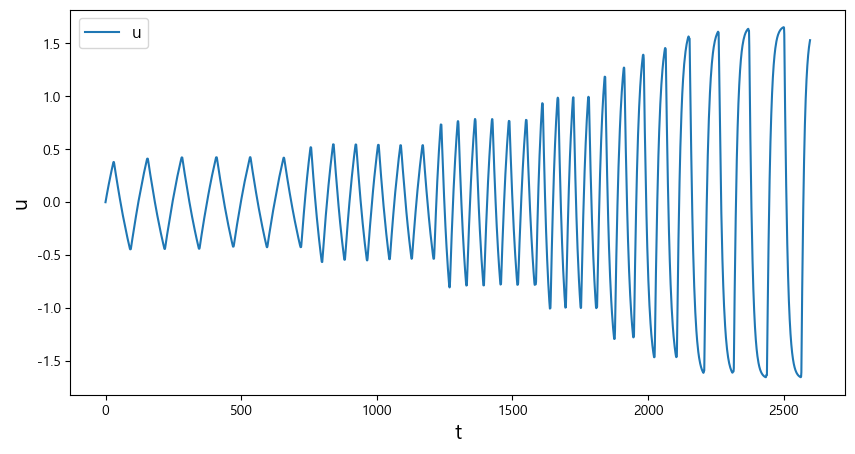

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(df_2['V2'], label = 'u')
plt.ylabel('u', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

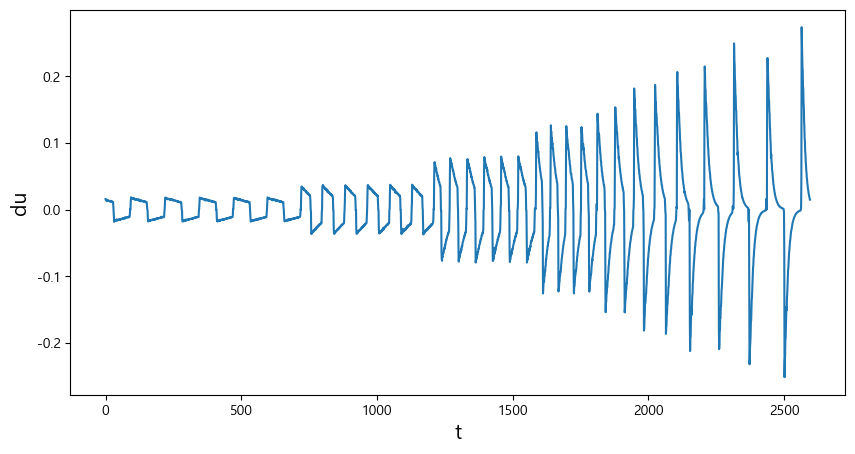

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(dx)
plt.ylabel('du', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.show()

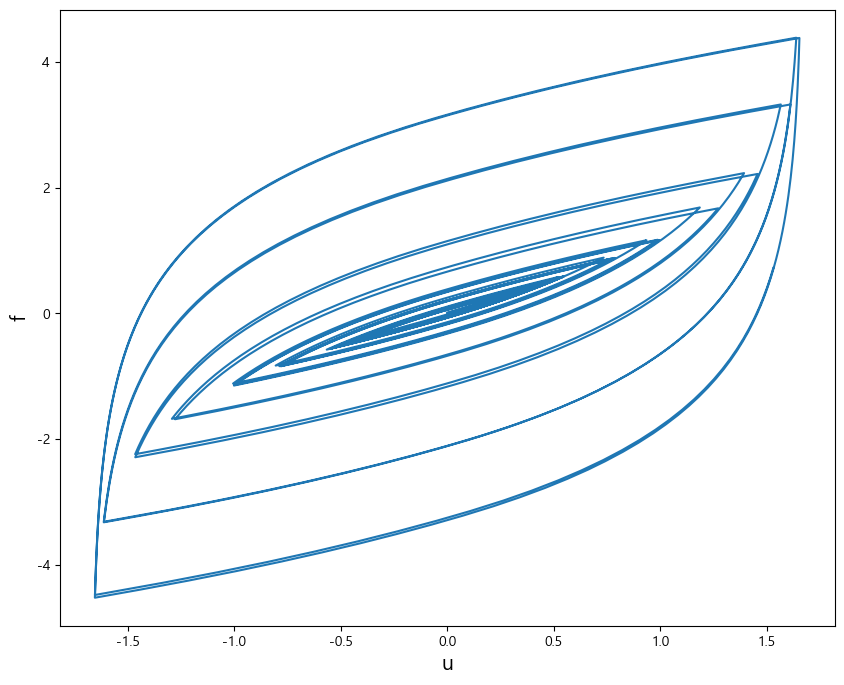

In [7]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V1'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

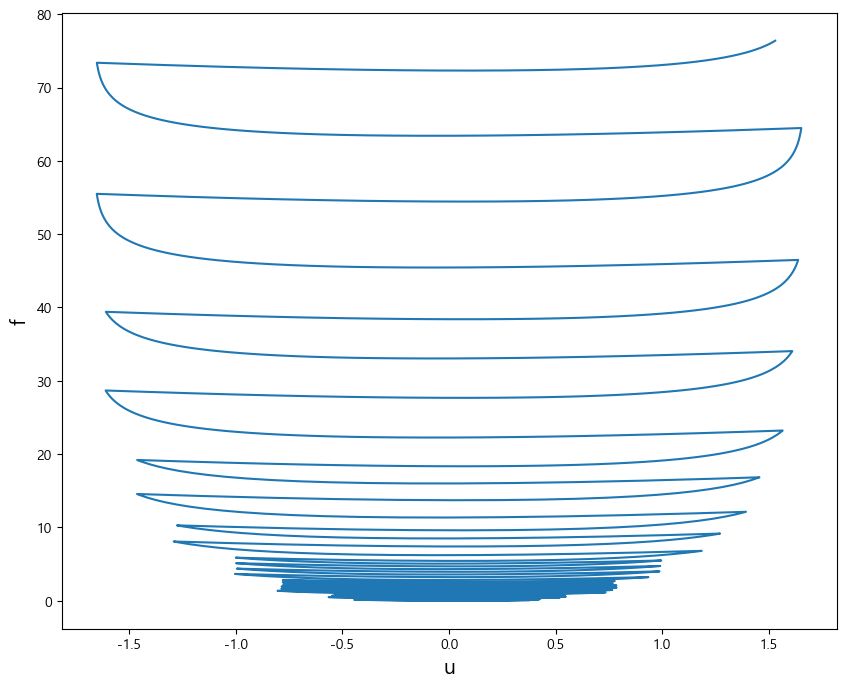

In [8]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V3'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

In [9]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [10]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [11]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # x
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


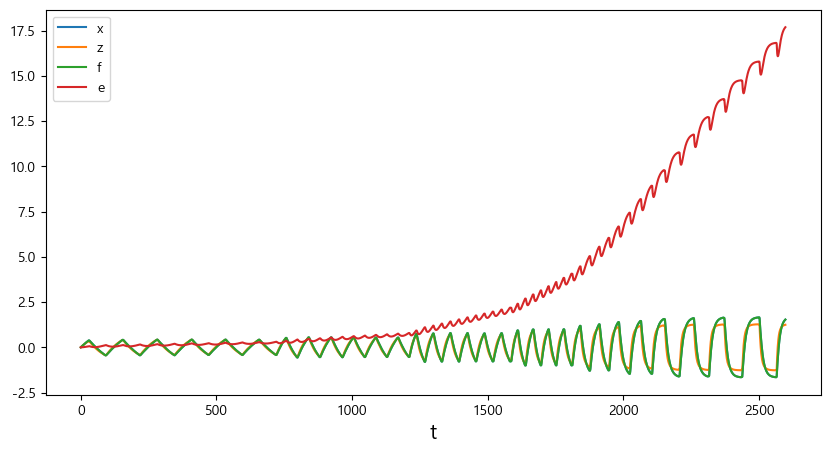

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,0], label = 'x')
plt.plot(result_matrix[:,1], label = 'z')
plt.plot(result_matrix[:,2], label = 'f')
plt.plot(result_matrix[:,3], label = 'e')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

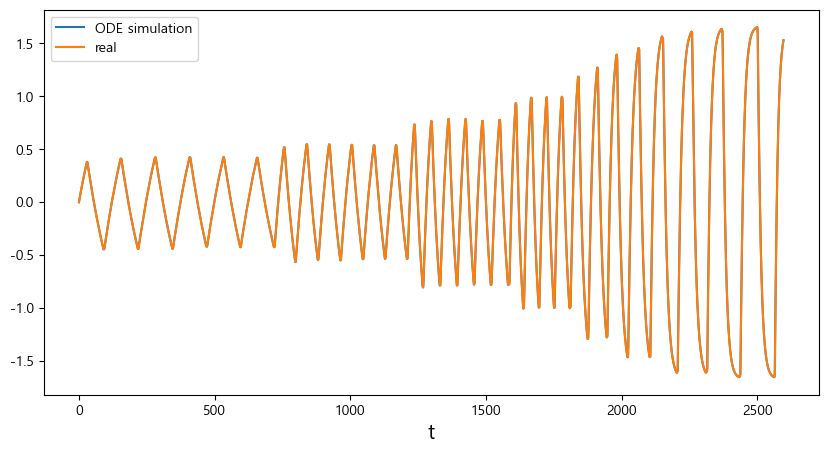

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,2], label = 'ODE simulation')
df_2.iloc[:,2].plot(label = 'real')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

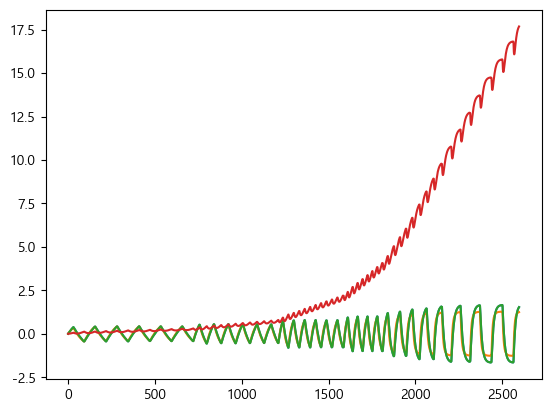

In [14]:
plt.plot(result_matrix[:,])

-----

In [15]:
df = make_data(dt = 1, total_time = 10000)

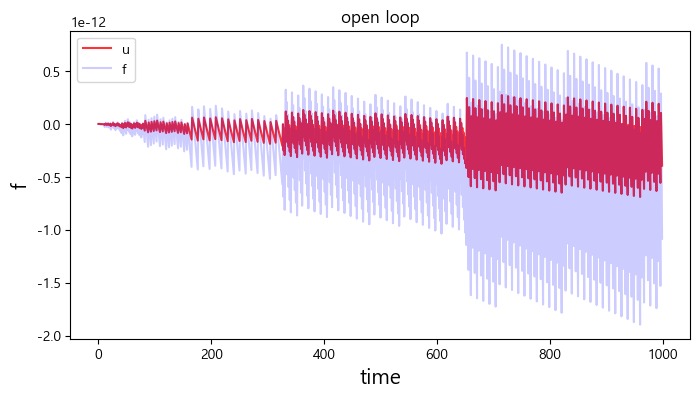

In [16]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u[:1000], alpha = 0.8, label = 'u', color = 'red')
plt.plot(df.f[:1000], alpha=0.2, label = 'f', color = 'blue')
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.legend()
plt.show()

In [17]:
df.f

0        0.000000e+00
1       -5.551115e-17
2       -1.665335e-16
3       -3.330669e-16
4       -4.496403e-15
             ...     
9996    -9.936274e-12
9997     1.885270e-12
9998    -6.306122e-12
9999    -1.449346e-11
10000   -2.671918e-12
Name: f, Length: 10001, dtype: float64

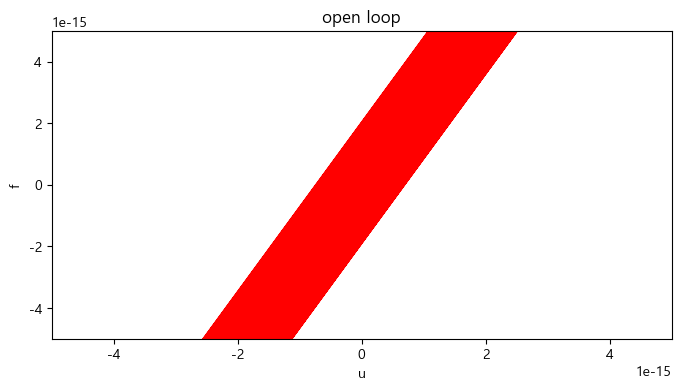

In [18]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u, df.f, color = 'red')
plt.ylim(-0.5*1e-14, 0.5*1e-14)
plt.xlim(-0.5*1e-14, 0.5*1e-14)
plt.ylabel('f')
plt.xlabel('u')
plt.show()

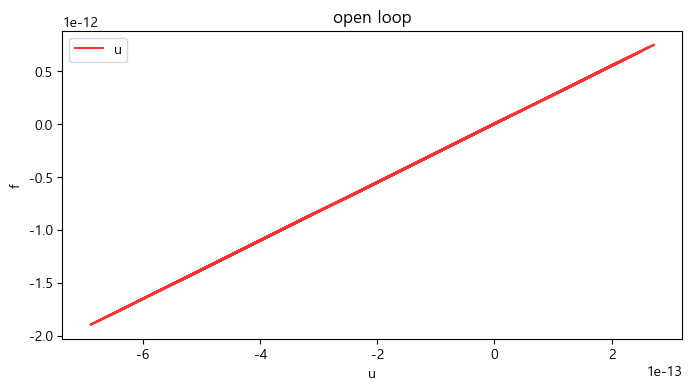

In [19]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u[:1000], df.f[:1000], alpha = 0.8, label = 'u', color = 'red')
plt.ylabel('f')
plt.xlabel('u')
plt.legend()
plt.show()

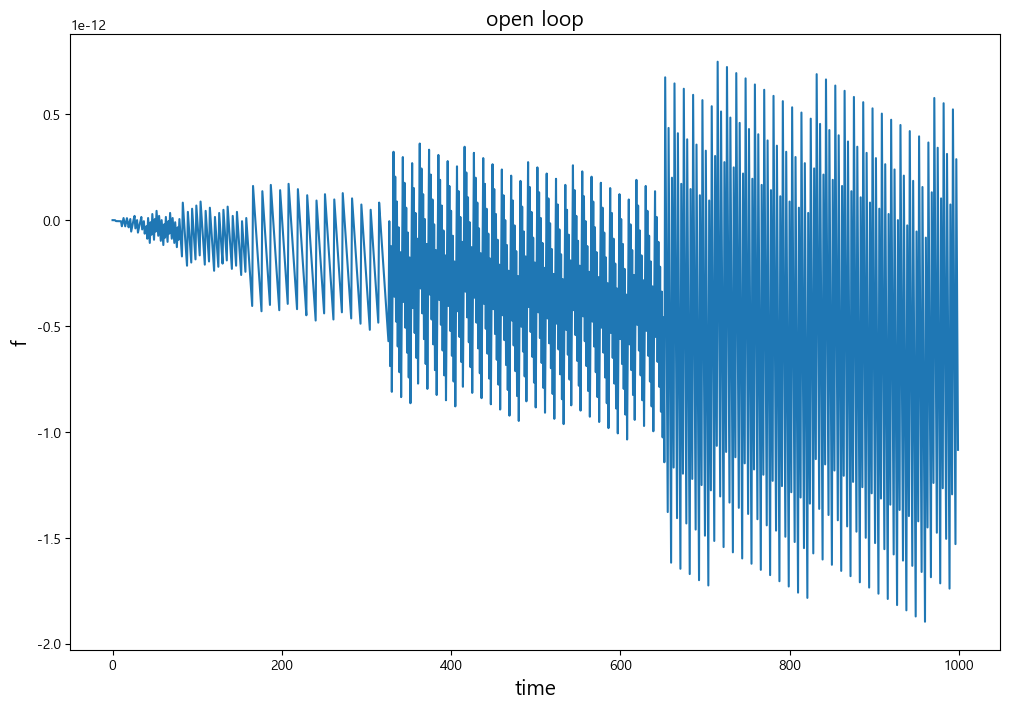

In [20]:
plt.figure(figsize=(12,8))
plt.title('open loop', fontsize = 15)
plt.plot(df.f[:1000])
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

In [21]:
train_df = df[:6000]
test_df = df[6000:]

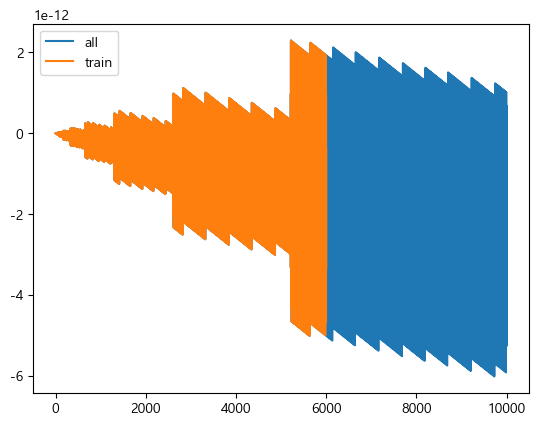

In [22]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

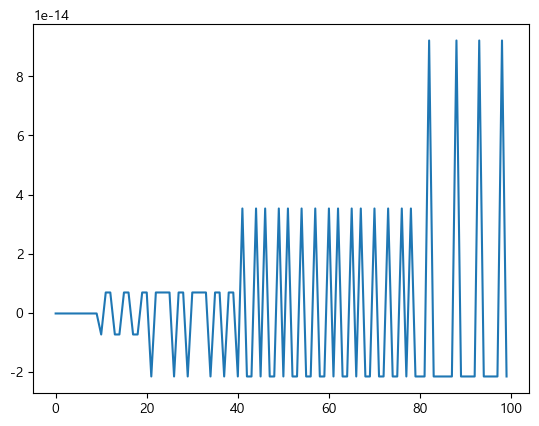

In [23]:
plt.plot(np.diff(df.u, axis=0)[:100])

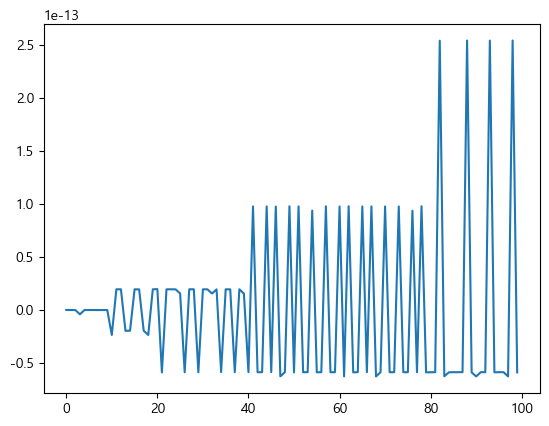

In [24]:
plt.plot(np.diff(df.f, axis=0)[:100])

In [25]:
d_x = np.diff(df.u, axis=0)

In [26]:
train_dx = d_x[:6000]
test_dx = d_x[6000:]

In [27]:
from pyswarm import pso

In [50]:
def objective_function(params, dx, target_df):
    gamma, beta, alpha, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(0, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [51]:
lb = [-10, -10, -10, -10] 
ub = [10, 10, 10, 10]

args = (train_dx, np.append(np.diff(train_df['f'], axis=0),0))

In [53]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=50, args = args, debug = True, minstep=1e-7)

No constraints given.


C:\Users\user\AppData\Local\Temp\ipykernel_15272\3115354175.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  dz = dx * (1-abs(z)**n * psi)


Best after iteration 1: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 2: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 3: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 4: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 5: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 6: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 7: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
Best after iteration 8: [ 1.21671428 -4.61023394 -9.95833046  4.21681996] 7.344743558322795e-05
New best for swarm at iteration 9: [ 2.01546714 -3.38674098 -7.19572605  1.97840327] 7.344743558322794e-05
Stopping search: Swarm best objective change less than 1e-08


In [54]:
optimized_params

array([ 2.01546714, -3.38674098, -7.19572605,  1.97840327])

In [55]:
gamma, beta, alpha, n = optimized_params

In [56]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [57]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(result_matrix_2[i,1], d_x[i], gamma, beta, alpha, 5)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


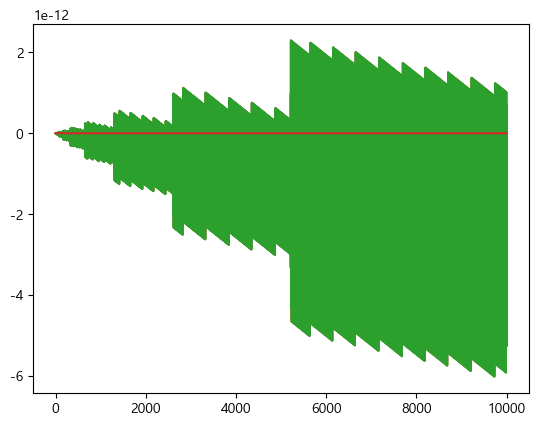

In [58]:
plt.plot(result_matrix_2)

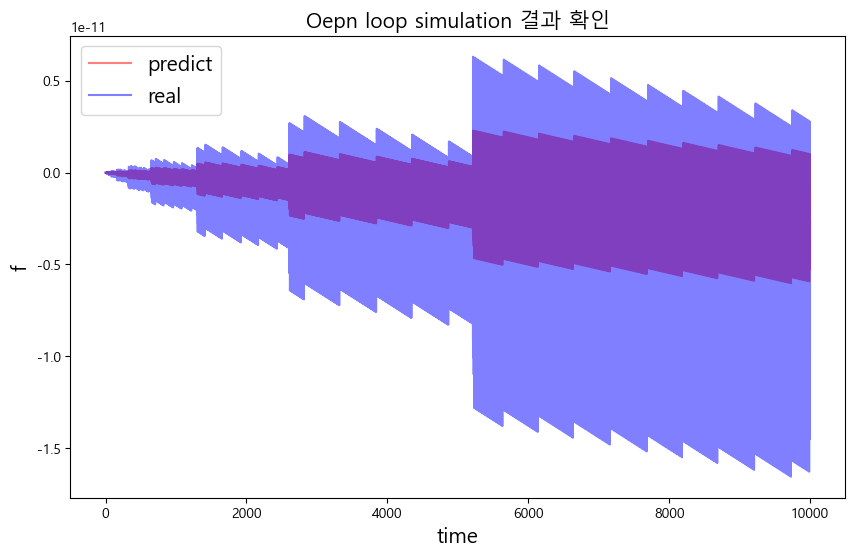

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)),result_matrix_2[:,2], color = 'red', alpha = 0.5)
plt.plot(range(len(df)), df.f, color = 'blue', alpha = 0.5)
plt.title('Oepn loop simulation 결과 확인', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

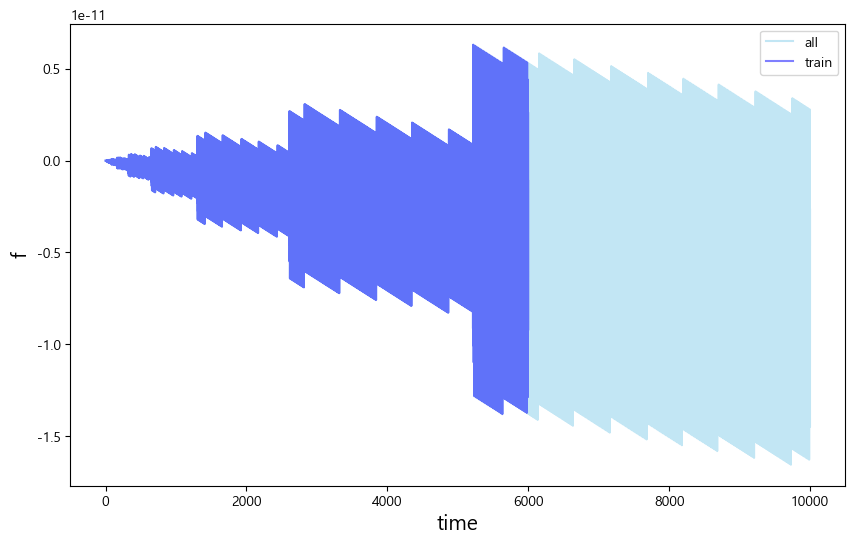

In [60]:
plt.figure(figsize=(10,6))
plt.plot(df.f, color = 'skyblue', alpha = 0.5)
plt.plot(train_df.f, color = 'blue', alpha = 0.5)
plt.legend(['all', 'train'])
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

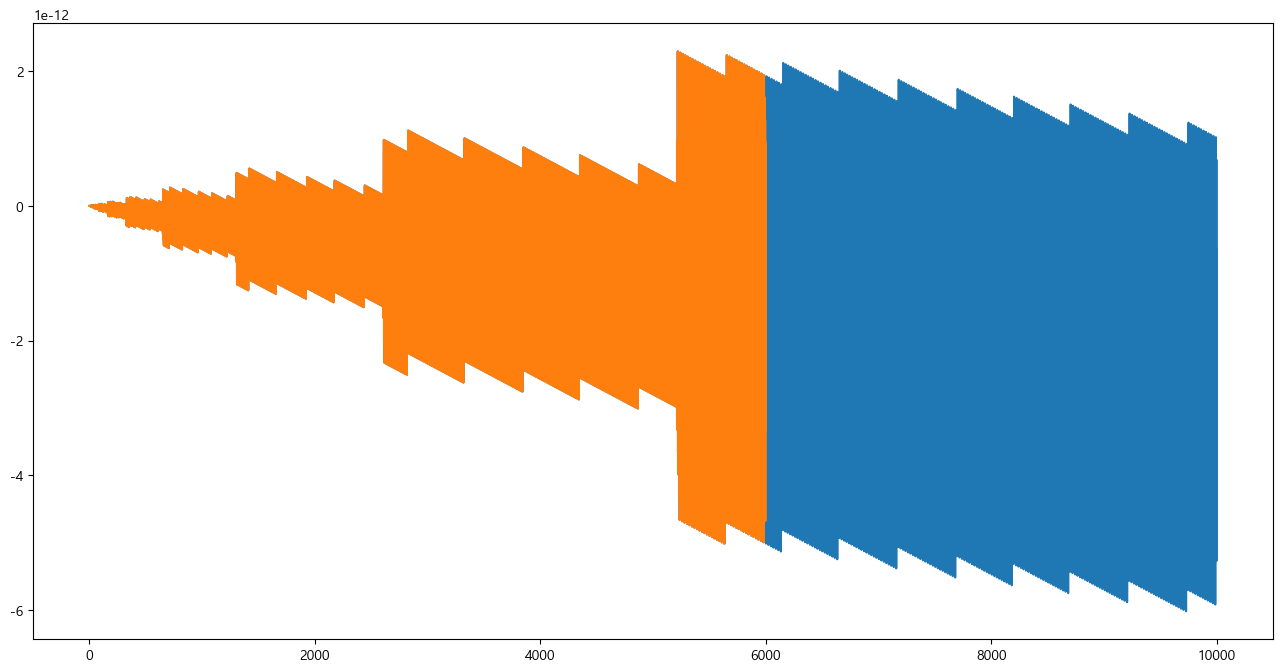

In [61]:
plt.figure(figsize=(16,8))
plt.plot(range(0, 10001, 1),result_matrix_2[:,2])
plt.plot(range(0, 6000, 1), train_df.u)
#plt.plot(range(8000, 10000, 1), test_df.u[:2000])

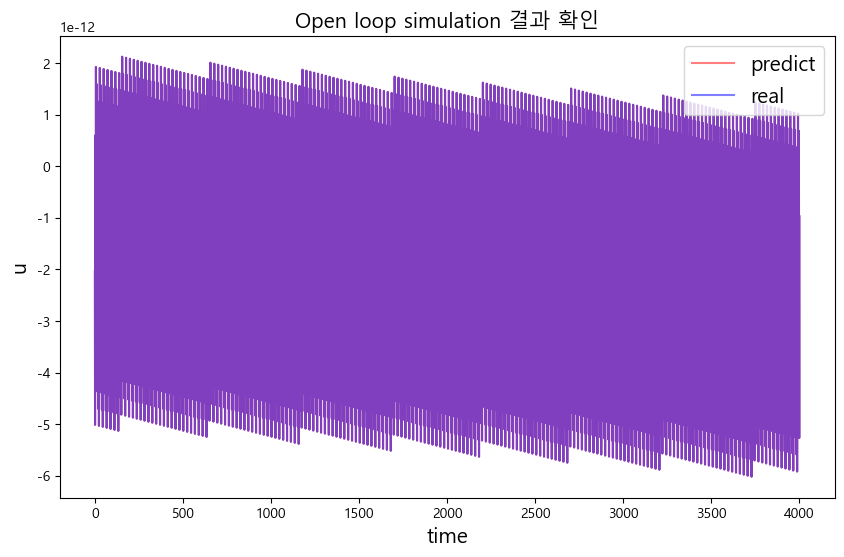

In [125]:
plt.figure(figsize = (10, 6))
plt.title('Open loop simulation 결과 확인', fontsize = 15)
plt.plot(range(4001),result_matrix_2[:,0][len(train_df):], alpha = 0.5, color = 'red')
plt.plot(range(4001), df.u[len(train_df):], alpha = 0.5, color = 'blue')
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

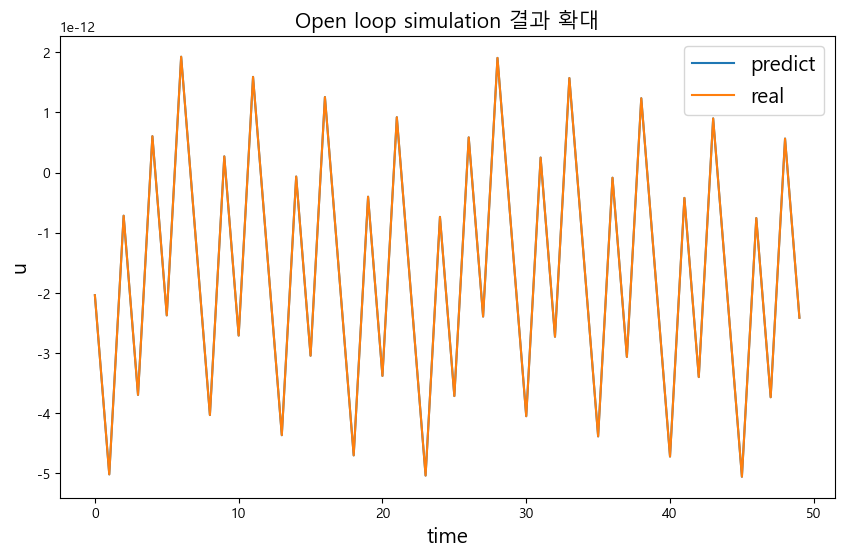

In [126]:
plt.figure(figsize = (10, 6))
plt.title('Open loop simulation 결과 확대', fontsize = 15)
plt.plot(range(50),result_matrix_2[:,0][len(train_df):len(train_df)+50])
plt.plot(range(50), df.u[len(train_df):len(train_df)+50])
plt.legend(['predict', 'real'], fontsize= 15)
plt.ylabel('u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

In [100]:
import tensorflow as tf
from tensorflow.keras import layers

In [111]:
pred_u_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [112]:
pred_u_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [113]:
pred_u_model.fit(train_df.u, train_df.f, epochs=100, verbose=1)

Epoch 1/100


188/188 [==============================] - 0s 595us/step - loss: 1.0703e-08 - mae: 4.0844e-05 - mse: 1.0703e-08
Epoch 2/100
188/188 [==============================] - 0s 611us/step - loss: 5.3067e-17 - mae: 2.9912e-09 - mse: 5.3067e-17
Epoch 3/100
188/188 [==============================] - 0s 604us/step - loss: 1.1914e-23 - mae: 2.6674e-12 - mse: 1.1914e-23
Epoch 4/100
188/188 [==============================] - 0s 604us/step - loss: 1.9114e-23 - mae: 3.4550e-12 - mse: 1.9114e-23
Epoch 5/100
188/188 [==============================] - 0s 610us/step - loss: 1.9953e-23 - mae: 3.5351e-12 - mse: 1.9953e-23
Epoch 6/100
188/188 [==============================] - 0s 610us/step - loss: 2.7098e-23 - mae: 4.1700e-12 - mse: 2.7098e-23
Epoch 7/100
188/188 [==============================] - 0s 597us/step - loss: 1.0879e-22 - mae: 8.8903e-12 - mse: 1.0879e-22
Epoch 8/100
188/188 [==============================] - 0s 594us/step - loss: 1.6689e-09 - mae: 1.7014e-05 - mse: 1.6689e-09
Epoch 9/100
188/188 

In [108]:
pred_f = pred_u_model.predict(test_df.u)

  1/126 [..............................] - ETA: 1s

126/126 [==============================] - 0s 496us/step


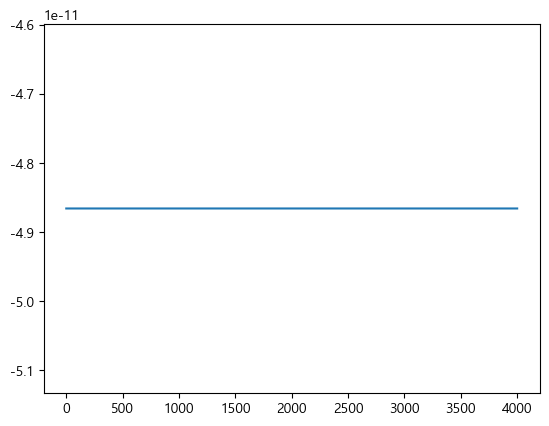

In [110]:
plt.plot(pred_f)

---------
-----------


In [64]:
close_df = make_data(dt = 0.01, total_time = 100)

In [65]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [66]:
close_df_train = close_df[:6000]
close_df_test = close_df[6000:]

In [67]:
close_dx = np.diff(close_df.u, axis=0)

In [68]:
train_close_dx = close_dx[:6000]
test_close_dx = close_dx[6000:]

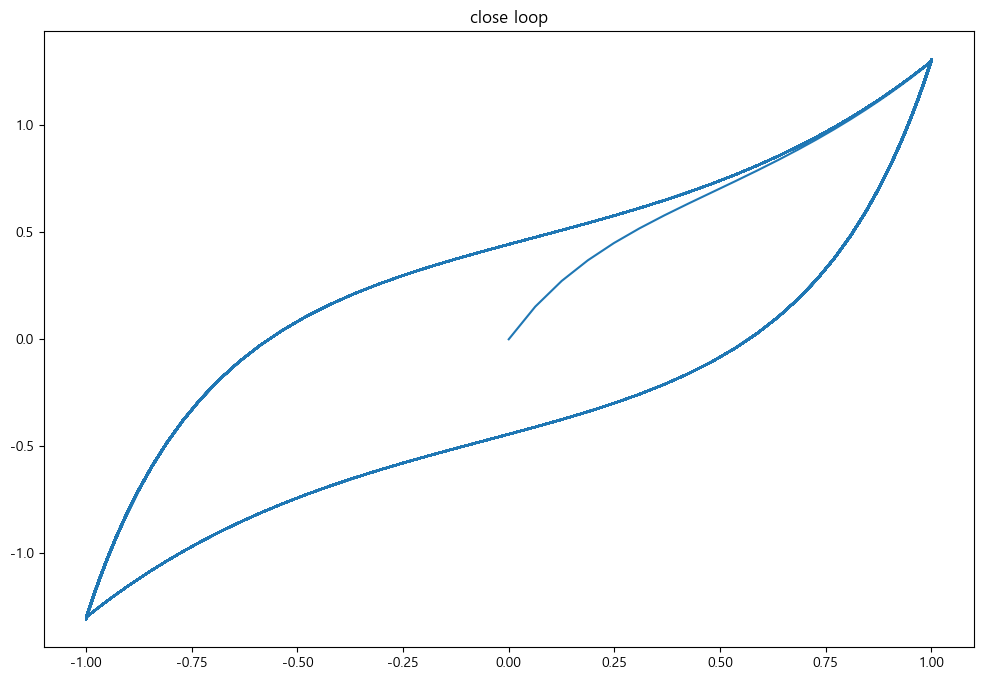

In [69]:
plt.figure(figsize=(12,8))
plt.title('close loop')
plt.plot(close_df.u, close_df.f)
plt.show()

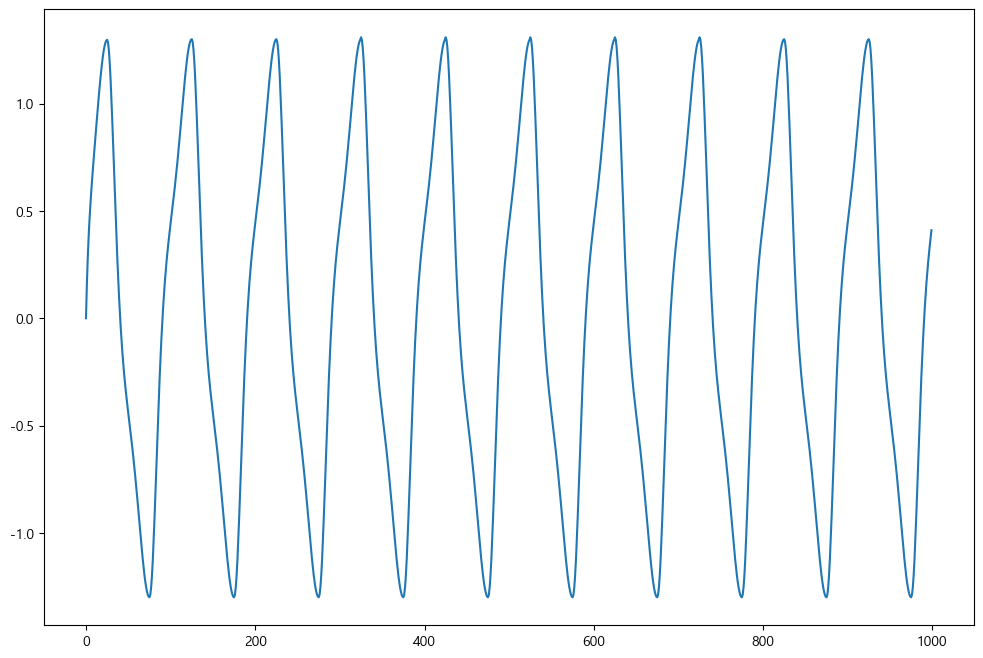

In [70]:
plt.figure(figsize=(12,8))
plt.plot(close_df.f[:1000])

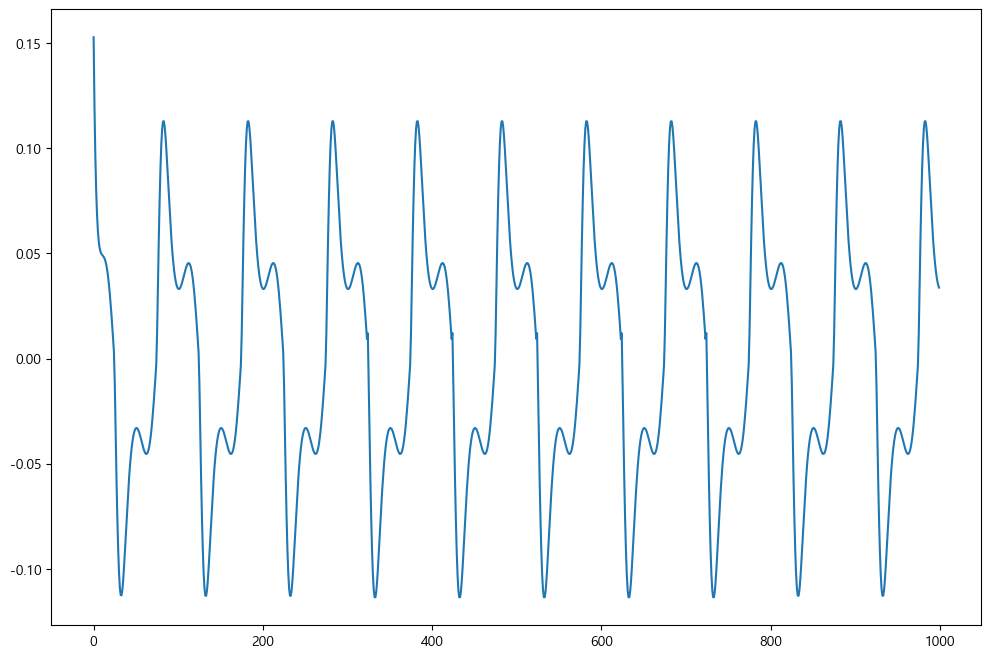

In [71]:
plt.figure(figsize=(12,8))
plt.plot(np.diff(close_df['f'], axis=0)[:1000])

In [72]:
traget_df = np.append(np.diff(close_df_train['f'], axis=0),0)

In [73]:
args_2 = (train_close_dx, traget_df)

In [74]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [75]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [76]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=100, args = args_2, debug=True, swarmsize=10, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.
New best for swarm at iteration 1: [-2.48308025  9.3611303  10.         10.         -9.58338522] 966995.5049410602
New best for swarm at iteration 1: [ 5.28806335  2.03896076  9.7184289   8.68947105 -8.81463091] 966995.4625402676
Best after iteration 1: [ 5.28806335  2.03896076  9.7184289   8.68947105 -8.81463091] 966995.4625402676
New best for swarm at iteration 2: [ 7.80727778  1.96882336  4.33900372  5.64509747 -8.26888872] 966992.3557599623
Best after iteration 2: [ 7.80727778  1.96882336  4.33900372  5.64509747 -8.26888872] 966992.3557599623
Best after iteration 3: [ 7.80727778  1.96882336  4.33900372  5.64509747 -8.26888872] 966992.3557599623
New best for swarm at iteration 4: [ 7.77494475  7.01178416  6.99969347  3.52363006 -8.40749579] 966790.7234104271
Best after iteration 4: [ 7.77494475  7.01178416  6.99969347  3.52363006 -8.40749579] 966790.7234104271
New best for swarm at iteration 5: [ 7.79054589  6.70586713  5.28952661  3.15486765 -8.82747578] 96675

In [77]:
optimized_params_2

array([ 9.55410432,  3.23403984,  0.45361801,  1.63746365, -7.88745885])

In [78]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [79]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [80]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, d_x[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_dx[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e

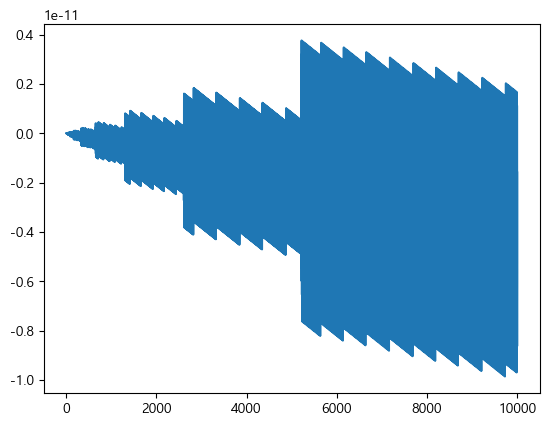

In [81]:
plt.plot(result_matrix_3[:,3])

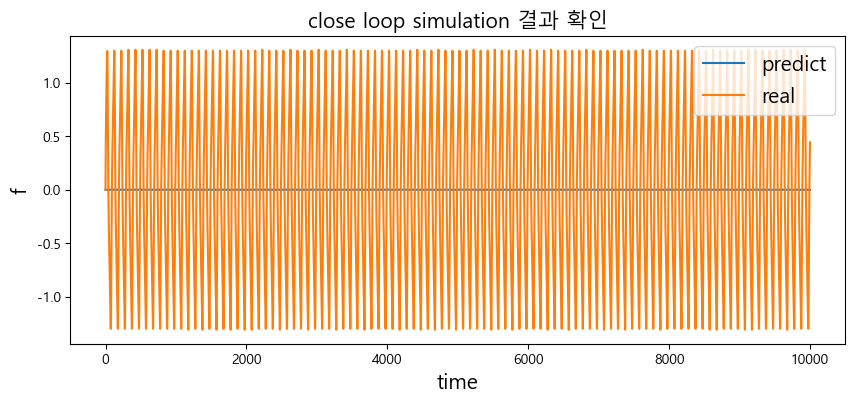

In [119]:
plt.figure(figsize=(10,4))
plt.plot(range(len(df)),result_matrix_3[:,2])
plt.plot(range(len(df)), close_df.f)
plt.title('close loop simulation 결과 확인', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

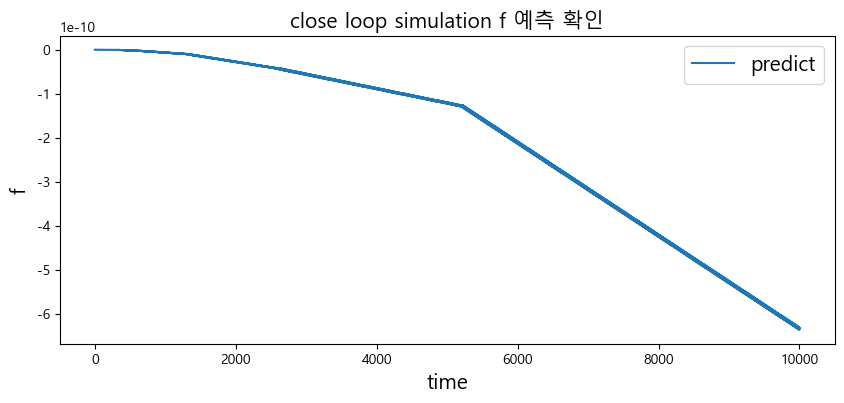

In [121]:
plt.figure(figsize=(10,4))
plt.plot(range(len(df)),result_matrix_3[:,2])
plt.title('close loop simulation f 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

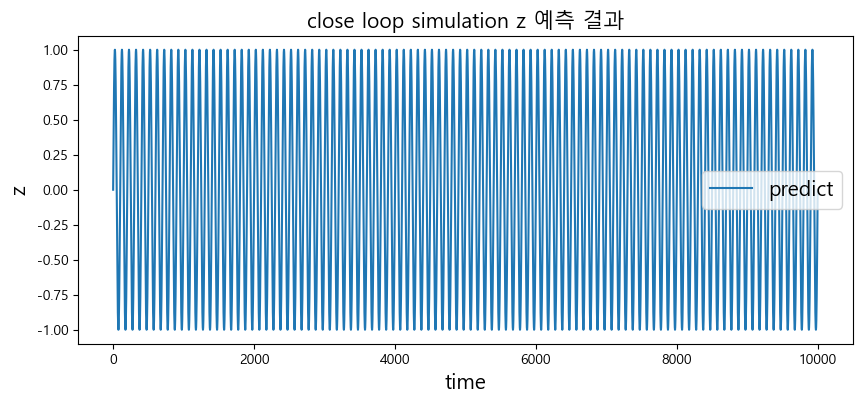

In [132]:
plt.figure(figsize=(10,4))
plt.plot(range(len(df)),result_matrix_3[:,0])
plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()